In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import librosa
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


In [14]:
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def load_data_from_folder(folder_path, emotion_labels):
    x_data = []
    y_data = []
    for label in emotion_labels:
        label_folder = os.path.join(folder_path, label)
        if not os.path.exists(label_folder):
            continue
        for file_name in os.listdir(label_folder):
            file_path = os.path.join(label_folder, file_name)
            features = extract_features(file_path)
            if features is not None:
                x_data.append(features)
                y_data.append(label)
    return np.array(x_data), np.array(y_data)

# Define paths
ravdess_path = 'ravdess'
tess_path = 'tess'

# Define emotion labels based on your dataset
emotion_labels = ['angry', 'happy', 'sad']  # Adjust based on your dataset

# Load data
x_data_ravdess, y_data_ravdess = load_data_from_folder(ravdess_path, emotion_labels)
x_data_tess, y_data_tess = load_data_from_folder(tess_path, emotion_labels)

# Combine datasets
x_data = np.concatenate((x_data_ravdess, x_data_tess), axis=0)
y_data = np.concatenate((y_data_ravdess, y_data_tess), axis=0)

# Encode labels
label_encoder = LabelEncoder()
y_data_encoded = label_encoder.fit_transform(y_data)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_encoded, test_size=0.2, random_state=42)

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import os
import numpy as np
import librosa

# Directory path
ravdess_path = 'Desktop/data/ravdess'

# List of emotions in RAVDESS dataset
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

# Prepare data
x_data = []
y_data = []

for emotion in emotions:
    emotion_path = os.path.join(ravdess_path, emotion)
    for file_name in os.listdir(emotion_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(emotion_path, file_name)
            features = extract_features(file_path)
            x_data.append(features)
            y_data.append(emotion)

x_data = np.array(x_data)
y_data = np.array(y_data)



In [ ]:
import os
import numpy as np
import librosa

# Directory path
ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\ravdess'

# List of emotions in RAVDESS dataset
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

# Prepare data
x_data = []
y_data = []

for emotion in emotions:
    emotion_path = os.path.join(ravdess_path, emotion)
    for file_name in os.listdir(emotion_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(emotion_path, file_name)
            features = extract_features(file_path)
            x_data.append(features)
            y_data.append(emotion)

x_data = np.array(x_data)
y_data = np.array(y_data)


In [ ]:
import os

ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\ravdess'
print("Files in ravdess_path:", os.listdir(ravdess_path))


In [ ]:
import os

ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\tess'
print("Files in ravdess_path:", os.listdir(ravdess_path))


In [ ]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Directory paths
ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\ravdess'
tess_path = r'C:\Users\akans\OneDrive\Desktop\data\tess'

# Emotions for RAVDESS
ravdess_emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'calm']

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

# Prepare data
x_data_ravdess = []
y_data_ravdess = []

# Iterate through each actor's folder
for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    for file_name in os.listdir(actor_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(actor_path, file_name)
            features = extract_features(file_path)
            
            # Emotion is often encoded in the filename; you might need to adjust this based on your filenames
            emotion = file_name.split('-')[2]  # Example: Extract emotion from filename
            
            if emotion in ravdess_emotions:
                x_data_ravdess.append(features)
                y_data_ravdess.append(emotion)

x_data_ravdess = np.array(x_data_ravdess)
y_data_ravdess = np.array(y_data_ravdess)

# Encode labels
label_encoder_ravdess = LabelEncoder()
y_data_encoded_ravdess = label_encoder_ravdess.fit_transform(y_data_ravdess)

# Split the data
x_train_ravdess, x_test_ravdess, y_train_ravdess, y_test_ravdess = train_test_split(
    x_data_ravdess, y_data_encoded_ravdess, test_size=0.2, random_state=42
)

print(f"RAVDESS Training samples: {x_train_ravdess.shape[0]}, Test samples: {x_test_ravdess.shape[0]}")


In [ ]:
# Emotions for TESS
tess_emotions = ['angry', 'happy', 'sad', 'fear', 'disgust', 'surprise', 'neutral']

# Prepare data
x_data_tess = []
y_data_tess = []

# Iterate through each emotion folder
for emotion_folder in os.listdir(tess_path):
    emotion_path = os.path.join(tess_path, emotion_folder)
    for subfolder in os.listdir(emotion_path):
        subfolder_path = os.path.join(emotion_path, subfolder)
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(subfolder_path, file_name)
                features = extract_features(file_path)
                emotion = subfolder.split('_')[1]  # Example: Extract emotion from folder name
                if emotion in tess_emotions:
                    x_data_tess.append(features)
                    y_data_tess.append(emotion)

x_data_tess = np.array(x_data_tess)
y_data_tess = np.array(y_data_tess)

# Encode labels
label_encoder_tess = LabelEncoder()
y_data_encoded_tess = label_encoder_tess.fit_transform(y_data_tess)

# Split the data
x_train_tess, x_test_tess, y_train_tess, y_test_tess = train_test_split(
    x_data_tess, y_data_encoded_tess, test_size=0.2, random_state=42
)

print(f"TESS Training samples: {x_train_tess.shape[0]}, Test samples: {x_test_tess.shape[0]}")


In [15]:
print(f"Shape of x_data_ravdess: {x_data_ravdess.shape}")
print(f"Shape of y_data_ravdess: {y_data_ravdess.shape}")


Shape of x_data_ravdess: (0,)
Shape of y_data_ravdess: (0,)


In [16]:
import os

# Print contents of the RAVDESS directory
ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\ravdess'
for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    print(f"Processing folder: {actor_path}")
    for file_name in os.listdir(actor_path):
        print(f"Found file: {file_name}")


Processing folder: C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01
Found file: 03-01-01-01-01-01-01.wav
Found file: 03-01-01-01-01-02-01.wav
Found file: 03-01-01-01-02-01-01.wav
Found file: 03-01-01-01-02-02-01.wav
Found file: 03-01-02-01-01-01-01.wav
Found file: 03-01-02-01-01-02-01.wav
Found file: 03-01-02-01-02-01-01.wav
Found file: 03-01-02-01-02-02-01.wav
Found file: 03-01-02-02-01-01-01.wav
Found file: 03-01-02-02-01-02-01.wav
Found file: 03-01-02-02-02-01-01.wav
Found file: 03-01-02-02-02-02-01.wav
Found file: 03-01-03-01-01-01-01.wav
Found file: 03-01-03-01-01-02-01.wav
Found file: 03-01-03-01-02-01-01.wav
Found file: 03-01-03-01-02-02-01.wav
Found file: 03-01-03-02-01-01-01.wav
Found file: 03-01-03-02-01-02-01.wav
Found file: 03-01-03-02-02-01-01.wav
Found file: 03-01-03-02-02-02-01.wav
Found file: 03-01-04-01-01-01-01.wav
Found file: 03-01-04-01-01-02-01.wav
Found file: 03-01-04-01-02-01-01.wav
Found file: 03-01-04-01-02-02-01.wav
Found file: 03-01-04-02-01-01-01.wav
Fo

In [17]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Path to the RAVDESS dataset
ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\ravdess'

# Define emotions for RAVDESS
ravdess_emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'calm']

# Function to extract features from audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

# Prepare data
x_data_ravdess = []
y_data_ravdess = []

# Iterate through each actor's folder
for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    for file_name in os.listdir(actor_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(actor_path, file_name)
            features = extract_features(file_path)
            # Extract emotion from filename
            # Example: Assuming the filename format contains emotion in a specific position
            emotion = file_name.split('-')[2]  # Adjust if necessary
            if emotion in ravdess_emotions:
                x_data_ravdess.append(features)
                y_data_ravdess.append(emotion)

x_data_ravdess = np.array(x_data_ravdess)
y_data_ravdess = np.array(y_data_ravdess)

print(f"Shape of x_data_ravdess: {x_data_ravdess.shape}")
print(f"Shape of y_data_ravdess: {y_data_ravdess.shape}")

# Encode labels
label_encoder_ravdess = LabelEncoder()
y_data_encoded_ravdess = label_encoder_ravdess.fit_transform(y_data_ravdess)

# Split the data
x_train_ravdess, x_test_ravdess, y_train_ravdess, y_test_ravdess = train_test_split(
    x_data_ravdess, y_data_encoded_ravdess, test_size=0.2, random_state=42
)

print(f"RAVDESS Training samples: {x_train_ravdess.shape[0]}, Test samples: {x_test_ravdess.shape[0]}")


Shape of x_data_ravdess: (0,)
Shape of y_data_ravdess: (0,)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [13]:
import os

# Path to the RAVDESS dataset
ravdess_path = r'C:\Users\akans\OneDrive\Desktop\data\ravdess'

# Check the contents of the path
for folder in os.listdir(ravdess_path):
    folder_path = os.path.join(ravdess_path, folder)
    print(f"Processing folder: {folder_path}")
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):
                print(f"Found file: {file_name}")


Processing folder: C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01
Found file: 03-01-01-01-01-01-01.wav
Found file: 03-01-01-01-01-02-01.wav
Found file: 03-01-01-01-02-01-01.wav
Found file: 03-01-01-01-02-02-01.wav
Found file: 03-01-02-01-01-01-01.wav
Found file: 03-01-02-01-01-02-01.wav
Found file: 03-01-02-01-02-01-01.wav
Found file: 03-01-02-01-02-02-01.wav
Found file: 03-01-02-02-01-01-01.wav
Found file: 03-01-02-02-01-02-01.wav
Found file: 03-01-02-02-02-01-01.wav
Found file: 03-01-02-02-02-02-01.wav
Found file: 03-01-03-01-01-01-01.wav
Found file: 03-01-03-01-01-02-01.wav
Found file: 03-01-03-01-02-01-01.wav
Found file: 03-01-03-01-02-02-01.wav
Found file: 03-01-03-02-01-01-01.wav
Found file: 03-01-03-02-01-02-01.wav
Found file: 03-01-03-02-02-01-01.wav
Found file: 03-01-03-02-02-02-01.wav
Found file: 03-01-04-01-01-01-01.wav
Found file: 03-01-04-01-01-02-01.wav
Found file: 03-01-04-01-02-01-01.wav
Found file: 03-01-04-01-02-02-01.wav
Found file: 03-01-04-02-01-01-01.wav
Fo

In [ ]:
emotion = file_name.split('-')[2]  # Example, adjust as needed


In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

# Prepare data
x_data_ravdess = []
y_data_ravdess = []

for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(actor_path, file_name)
                features = extract_features(file_path)
                print(f"Extracted features from {file_path}")
                # Extract emotion from filename
                emotion = file_name.split('-')[2]  # Adjust if necessary
                if emotion in ravdess_emotions:
                    x_data_ravdess.append(features)
                    y_data_ravdess.append(emotion)

x_data_ravdess = np.array(x_data_ravdess)
y_data_ravdess = np.array(y_data_ravdess)

print(f"Shape of x_data_ravdess: {x_data_ravdess.shape}")
print(f"Shape of y_data_ravdess: {y_data_ravdess.shape}")


In [ ]:
if len(x_data_ravdess) == 0 or len(y_data_ravdess) == 0:
    print("Data is empty. Check the feature extraction and emotion extraction steps.")
else:
    # Encode labels and split the data
    label_encoder_ravdess = LabelEncoder()
    y_data_encoded_ravdess = label_encoder_ravdess.fit_transform(y_data_ravdess)
    
    x_train_ravdess, x_test_ravdess, y_train_ravdess, y_test_ravdess = train_test_split(
        x_data_ravdess, y_data_encoded_ravdess, test_size=0.2, random_state=42
    )
    
    print(f"RAVDESS Training samples: {x_train_ravdess.shape[0]}, Test samples: {x_test_ravdess.shape[0]}")


In [18]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
x_data_ravdess = []
y_data_ravdess = []

for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(actor_path, file_name)
                features = extract_features(file_path)
                if features is not None:
                    print(f"Extracted features from {file_path}")
                    # Extract emotion from filename
                    emotion = file_name.split('-')[2]  # Adjust if necessary
                    if emotion in ravdess_emotions:
                        x_data_ravdess.append(features)
                        y_data_ravdess.append(emotion)

x_data_ravdess = np.array(x_data_ravdess)
y_data_ravdess = np.array(y_data_ravdess)

print(f"Shape of x_data_ravdess: {x_data_ravdess.shape}")
print(f"Shape of y_data_ravdess: {y_data_ravdess.shape}")


Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-01-01-01-01-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-01-01-01-02-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-01-01-02-01-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-01-01-02-02-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-02-01-01-01-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-02-01-01-02-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-02-01-02-01-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-02-01-02-02-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Actor_01\03-01-02-02-01-01-01.wav
Extracted features from C:\Users\akans\OneDrive\Desktop\data\ravdess\Acto

In [18]:
for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.wav'):
                print(f"Filename: {file_name}")
                # Print the part where emotion is extracted
                print(f"Emotion part: {file_name.split('-')[2]}")


Filename: 03-01-01-01-01-01-01.wav
Emotion part: 01
Filename: 03-01-01-01-01-02-01.wav
Emotion part: 01
Filename: 03-01-01-01-02-01-01.wav
Emotion part: 01
Filename: 03-01-01-01-02-02-01.wav
Emotion part: 01
Filename: 03-01-02-01-01-01-01.wav
Emotion part: 02
Filename: 03-01-02-01-01-02-01.wav
Emotion part: 02
Filename: 03-01-02-01-02-01-01.wav
Emotion part: 02
Filename: 03-01-02-01-02-02-01.wav
Emotion part: 02
Filename: 03-01-02-02-01-01-01.wav
Emotion part: 02
Filename: 03-01-02-02-01-02-01.wav
Emotion part: 02
Filename: 03-01-02-02-02-01-01.wav
Emotion part: 02
Filename: 03-01-02-02-02-02-01.wav
Emotion part: 02
Filename: 03-01-03-01-01-01-01.wav
Emotion part: 03
Filename: 03-01-03-01-01-02-01.wav
Emotion part: 03
Filename: 03-01-03-01-02-01-01.wav
Emotion part: 03
Filename: 03-01-03-01-02-02-01.wav
Emotion part: 03
Filename: 03-01-03-02-01-01-01.wav
Emotion part: 03
Filename: 03-01-03-02-01-02-01.wav
Emotion part: 03
Filename: 03-01-03-02-02-01-01.wav
Emotion part: 03
Filename: 03

In [19]:
import numpy as np
import os
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define paths and emotions
ravdess_path = 'C:/Users/akans/OneDrive/Desktop/data/ravdess'
ravdess_emotions = {
    '01': 'Neutral',
    '02': 'Calm',
    '03': 'Happy',
    '04': 'Sad',
    '05': 'Angry',
    '06': 'Fearful',
    '07': 'Disgust',
    '08': 'Surprised'
}

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
x_data_ravdess = []
y_data_ravdess = []

for actor_folder in os.listdir(ravdess_path):
    actor_path = os.path.join(ravdess_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(actor_path, file_name)
                features = extract_features(file_path)
                if features is not None:
                    # Extract emotion from filename
                    emotion_code = file_name.split('-')[2]  # Emotion code is the 3rd part
                    emotion = ravdess_emotions.get(emotion_code, None)
                    if emotion:
                        x_data_ravdess.append(features)
                        y_data_ravdess.append(emotion)

x_data_ravdess = np.array(x_data_ravdess)
y_data_ravdess = np.array(y_data_ravdess)

print(f"Shape of x_data_ravdess: {x_data_ravdess.shape}")
print(f"Shape of y_data_ravdess: {y_data_ravdess.shape}")

# Encode the labels
label_encoder_ravdess = LabelEncoder()
y_data_encoded_ravdess = label_encoder_ravdess.fit_transform(y_data_ravdess)

# Split the data
x_train_ravdess, x_test_ravdess, y_train_ravdess, y_test_ravdess = train_test_split(
    x_data_ravdess, y_data_encoded_ravdess, test_size=0.2, random_state=42
)

print(f"RAVDESS Training samples: {x_train_ravdess.shape[0]}, Test samples: {x_test_ravdess.shape[0]}")



Shape of x_data_ravdess: (1440, 40)
Shape of y_data_ravdess: (1440,)
RAVDESS Training samples: 1152, Test samples: 288


In [20]:
import numpy as np
import os
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define paths and emotions
tess_path = 'C:/Users/akans/OneDrive/Desktop/data/tess'
tess_emotions = {
    'angry': 'Angry',
    'happy': 'Happy',
    'fearful': 'Fearful',
    'sad': 'Sad',
    'surprised': 'Surprise',
    'disgust': 'Disgust',
    'neutral': 'Neutral'
}

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        return np.mean(mfccs.T, axis=0)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Prepare data
x_data_tess = []
y_data_tess = []

for emotion_folder in os.listdir(tess_path):
    emotion_path = os.path.join(tess_path, emotion_folder)
    if os.path.isdir(emotion_path):
        for file_name in os.listdir(emotion_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(emotion_path, file_name)
                features = extract_features(file_path)
                if features is not None:
                    # Extract emotion from folder name
                    emotion = tess_emotions.get(emotion_folder.split('_')[1], None)
                    if emotion:
                        x_data_tess.append(features)
                        y_data_tess.append(emotion)

x_data_tess = np.array(x_data_tess)
y_data_tess = np.array(y_data_tess)

print(f"Shape of x_data_tess: {x_data_tess.shape}")
print(f"Shape of y_data_tess: {y_data_tess.shape}")



Shape of x_data_tess: (2000, 40)
Shape of y_data_tess: (2000,)


In [21]:
# Combine RAVDESS and TESS data
x_data_combined = np.vstack((x_data_ravdess, x_data_tess))
y_data_combined = np.concatenate((y_data_ravdess, y_data_tess))

# Encode the combined labels
label_encoder_combined = LabelEncoder()
y_data_encoded_combined = label_encoder_combined.fit_transform(y_data_combined)

# Split the combined data
x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(
    x_data_combined, y_data_encoded_combined, test_size=0.2, random_state=42
)

print(f"Combined Training samples: {x_train_combined.shape[0]}, Test samples: {x_test_combined.shape[0]}")


Combined Training samples: 2752, Test samples: 688


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical format
y_train_encoded_combined = to_categorical(y_train_combined)
y_test_encoded_combined = to_categorical(y_test_combined)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_combined.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder_combined.classes_), activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_combined, y_train_encoded_combined, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test_combined, y_test_encoded_combined))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_combined, y_test_encoded_combined)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


C:\Users\akans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1430 - loss: 61.4202 - val_accuracy: 0.1773 - val_loss: 2.0722
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1646 - loss: 6.1164 - val_accuracy: 0.1788 - val_loss: 2.0592
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1500 - loss: 2.9534 - val_accuracy: 0.1788 - val_loss: 2.0441
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1788 - loss: 2.3626 - val_accuracy: 0.1788 - val_loss: 2.0308
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1809 - loss: 2.2510 - val_accuracy: 0.1788 - val_loss: 2.0208
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1780 - loss: 2.1402 - val_accuracy: 0.1802 - val_loss: 2.0126
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1691 - loss: 2.0874 - val_accuracy: 0.1802 - val_loss: 2.0063
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1752 - loss: 2.0613 - val_accuracy: 0.1802 - val_loss

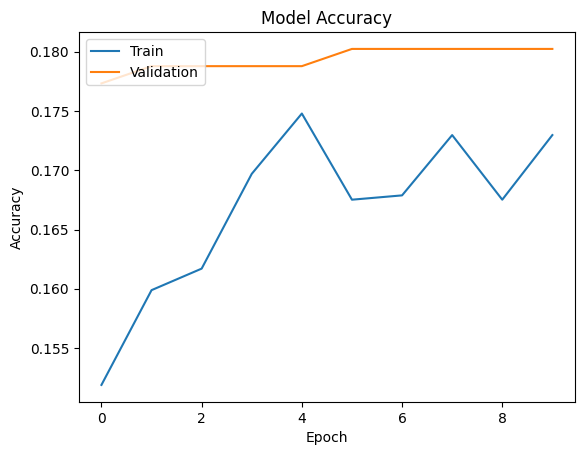

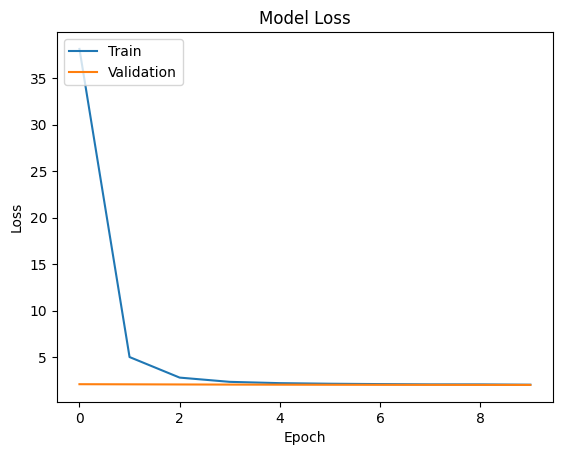

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [24]:
!pip install matplotlib


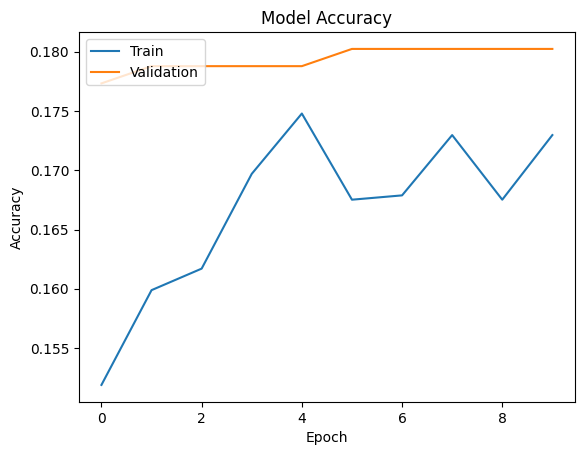

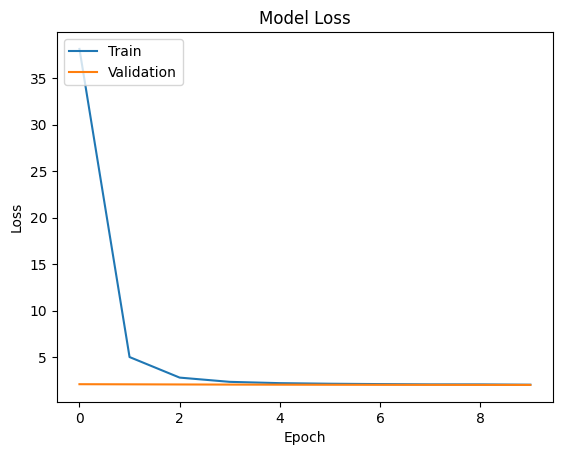

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [26]:
model.save('emotion_recognition_model.h5')


In [27]:
model.save('emotion_recognition_model.keras')


In [28]:
!pip install pyaudio librosa tensorflow


In [29]:
import pyaudio
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model
from scipy.signal import get_window


In [30]:
model = load_model('emotion_recognition_model.keras')


C:\Users\akans\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
def capture_audio(duration=5, rate=16000, chunk=1024):
    """
    Capture audio from the microphone.
    """
    audio = pyaudio.PyAudio()
    stream = audio.open(format=pyaudio.paInt16, channels=1, rate=rate, input=True, frames_per_buffer=chunk)
    print("Recording...")
    frames = []
    
    for _ in range(int(rate / chunk * duration)):
        data = stream.read(chunk)
        frames.append(data)
    
    print("Recording complete.")
    stream.stop_stream()
    stream.close()
    audio.terminate()
    
    audio_data = np.frombuffer(b''.join(frames), dtype=np.int16)
    return audio_data

def preprocess_audio(audio_data, rate=16000):
    """
    Preprocess the audio data for prediction.
    """
    # Extract features
    audio_data = audio_data.astype(np.float32) / np.max(np.abs(audio_data))
    mfccs = librosa.feature.mfcc(y=audio_data, sr=rate, n_mfcc=40)
    features = np.mean(mfccs.T, axis=0)
    return np.expand_dims(features, axis=0)  # Add batch dimension

def predict_emotion(model, features):
    """
    Predict emotion from audio features.
    """
    prediction = model.predict(features)
    emotion_index = np.argmax(prediction)
    return emotion_index

# Emotion mapping (as used in your model)
emotion_labels = ['Surprise', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Calm', 'Neutral']


In [47]:
# Capture audio
audio_data = capture_audio(duration=5)

# Preprocess audio
features = preprocess_audio(audio_data)

# Predict emotion
emotion_index = predict_emotion(model, features)
print(f"Predicted Emotion: {emotion_labels[emotion_index]}")


Recording...
Recording complete.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Emotion: Calm
